# TFRecords 
*El formato TFRecord es un formato simple para almacenar una secuencia de registros binarios.*
Es el formato recomendado para el framework TensorFlow. Este formato ayudar a mitigar los cuellos de botella que se pueden generar en la carga y procesamiento de los datos.

### Creando y leyendo un TFRecord

In [ ]:
import tensorflow as tf
import numpy as np

Los TFRecords almacenan secuencia de records binarios

In [ ]:
n_observaciones = 1000
m_features = 20
dataset = np.random.uniform(size=(n_observaciones,m_features))

In [ ]:
dataset.shape,dataset.dtype

((1000, 20), dtype('float64'))

Para crear un TFRecord `tf.io.TFRecordWriter(path)`

Un TFRecord es un archivo binario que contiene secuencias de cadenas de bytes(byte-string). Los datos deben serializarse (codificados como una cadena de bytes) antes de escribirse en un TFRecord.


In [ ]:
name = 'myFirts.tfrecord'
with tf.io.TFRecordWriter(name) as file:
    for instance in dataset:
        file.write(tf.io.serialize_tensor(instance).numpy()) #byte-string

In [ ]:
tf.io.serialize_tensor(instance)

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x02\x12\x04\x12\x02\x08\x14"\xa0\x01\x04TWU\xe6\xcc\xde?\xc2\x87\xc3\tj\xf2\xd2?]\xed\xc4\x12\xd8\xe6\xea?U\xc8\x0e%?m\xee?\xd201v\xfaw\xdc?\xbd\x96>\xd7]Q\xee?\x9f$\x03\xf1\xb8\xd6\xe4?\xc6w\x11\xe8x\xcf\xd3?\x00q\x0c\xdb\xf4\xae\xc5?\x12\xc8}V6]\xd1?\x0c+\x98\x83\x91U\xce?\xcc\x9d\x83A\xa1c\xe9?i\xdcS\xe5\xf9\x06\xe8?\x14\x9d\x91\x08\xd5\xf7\xe3?.?{skF\xe8?\xe4lF\xc7{+\xd4?X\xb3}8\xd6\xd2\xb4?\x82\x07W\xaf]\xf0\xd4?\x98\x92O\x82a\xba\xd4?\xd0\x84G\xeb\xecD\xe7?'>

In [ ]:
b'\xcf\x84o\xcf\x81\xce\xbdo\xcf\x82'.decode('utf-16'),b'\xcf\x84o\xcf\x81\xce\xbdo\xcf\x82'.decode('utf-8')

('蓏콯캁澽苏', 'τoρνoς')

Para leer un TFRecord `tf.data.TFRecordDataset(path o patter)`

In [ ]:
data = tf.data.TFRecordDataset(name)

In [ ]:
for i in data.take(1):
    print(i)

tf.Tensor(b'\x08\x02\x12\x04\x12\x02\x08\x14"\xa0\x01HJ\xf2\x0b\xe1\xc2\xdc?v{\x17\x86\xb6\x03\xe1?\xfe\x03U\x82\x93\xa5\xd7?\xa1~,\xcd\xceS\xec?\xb0\xf63\x96\xd4\xb6\xc1?\xc6\xcd;\xaf\x84\x9a\xe2?\x00\xd8\xde\x89p\xec]?$\xb9W\xf11]\xe8?\xa0!\x04\x1a\xaf\x08\xdd?6,\x11r\xa0\xe8\xe1?\xa0u\xb0A\xa5_\xd3?B\xeaP\xd8\xf7\xce\xd2?\x92\xbf\xa3\xab}\r\xd2?.\x1bGlJ\xaa\xd2?\xb8\xa8\x8e\xfb~C\xd8?\xa0\xc1^\x0f8d\xca?k{@\xabz\x7f\xe8?y#\xb3M\xd7\x8f\xee?\x1e\x80>\xa4DB\xeb?\x07x\x1aim\xd3\xe6?', shape=(), dtype=string)


In [ ]:
data = data.map(lambda x:tf.io.parse_tensor(x,tf.float64))
data = data.shuffle(buffer_size=1)
data = data.batch(1)

for i in data.take(1):
    print(i),print(dataset[0])

tf.Tensor(
[[0.44939448 0.53170325 0.36948097 0.88523045 0.13839204 0.5813621
  0.00182639 0.76137635 0.45365503 0.55964682 0.30271274 0.29388233
  0.28207342 0.29164372 0.37911963 0.20618344 0.76556142 0.95505872
  0.85183937 0.71330901]], shape=(1, 20), dtype=float64)
[0.44939448 0.53170325 0.36948097 0.88523045 0.13839204 0.5813621
 0.00182639 0.76137635 0.45365503 0.55964682 0.30271274 0.29388233
 0.28207342 0.29164372 0.37911963 0.20618344 0.76556142 0.95505872
 0.85183937 0.71330901]


Resulta incomodo cuando tenemos diferentes tipos de datos(string,números,imágenes) que componen un solo ejemplo o muestra

### Protocolo Buffers 
Cuando hablamos de datos estructurados la mejor manera de usar TFRecords es usando protocolos de serialización por [buffers](https://developers.google.com/protocol-buffers), esto lo logramos usando `tf.train.Feature -> tf.train.Features -> tf.train.Example `. 

`tf.train.Feature` representa una feature, `tf.train.Features` representa un conjunto de features y `tf.train.Example` representa una instancia o una muestra.

#### `tf.train.Feature`

Solo acepta los siguientes tipos de datos 

1. `tf.train.BytesList` 

  - `string`
  - `byte`

1. `tf.train.FloatList`

  - `float` (`float32`)
  - `double` (`float64`)

1. `tf.train.Int64List`

  - `bool`
  - `enum`
  - `int32`
  - `uint32`
  - `int64`
  - `uint64`

### Creando un TFRecord con protocolo buffer

In [ ]:
n_observaciones = int(1000)

images = np.random.uniform(size=(n_observaciones,28,28,3))

true_or_false = np.random.choice([False, True], n_observaciones)

posibleLabels = np.array(['perro','pato','gato','raton','conejo','cuy'])

labels = posibleLabels[np.random.randint(0, 5, n_observaciones)]

In [ ]:
images.shape,true_or_false.shape,labels.shape

((1000, 28, 28, 3), (1000,), (1000,))

In [ ]:
true_or_false[0],labels[0]

(True, 'conejo')

In [ ]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

In [ ]:
name = 'dataset.tfrecord'
with tf.io.TFRecordWriter(name) as file:

    for image,boolean,label in zip(images,true_or_false,labels):

        dimensions = image.shape
        serialize_image = tf.io.serialize_tensor(image).numpy()
        label = label.encode('utf-8')
        data =Example(features=Features(
            feature={
            "image": Feature(bytes_list=BytesList(value=[serialize_image])),
            "dimensions":Feature(int64_list=Int64List(value=dimensions)),
            "label": Feature(bytes_list=BytesList(value=[label])),
            "positivo": Feature(int64_list=Int64List(value=[boolean]))
        }))
        file.write(data.SerializeToString()) #bytes-string

        

### Leyendo el TFRecord

In [ ]:
dataset = tf.data.TFRecordDataset(name)

In [ ]:
for i in dataset.take(1):
    print(i)

tf.Tensor(b'\n\xea\x93\x01\n\x13\n\x05label\x12\n\n\x08\n\x06conejo\n\x15\n\ndimensions\x12\x07\x1a\x05\n\x03\x1c\x1c\x03\n\x11\n\x08positivo\x12\x05\x1a\x03\n\x01\x01\n\xa7\x93\x01\n\x05image\x12\x9c\x93\x01\n\x98\x93\x01\n\x94\x93\x01\x08\x02\x12\x0c\x12\x02\x08\x1c\x12\x02\x08\x1c\x12\x02\x08\x03"\x80\x93\x01\xde6\xf3\x15\t\x16\xef?\x9b\xd3\xc2\x80\x93\xb7\xed?\x04~\xbf\xa4\xae\x06\xeb?U\xc2m#4&\xe9?\xda;\xdf\x00\x83,\xe1?\xa6\xc3\x07\xc9\x16\x8f\xd3?N\xff\xa2\xf4\xfd0\xdc?\xb2\r\x84\x83.~\xd5?\xe4"$\x847t\xe1?\xa8N\'\xe5~w\xef?\x82\x1cg\xdc)\xbc\xed?B\x1c\xfc\x0eD\x7f\xda?\xf8\x8e\xe1\xa4x\xed\xd7?\xa0\x06\xd0N\xfb\xb6\xaf?\xa6}\x9bBy\xb1\xe8?\x83\x06\x98\xbd\x9a\xe0\xe0?2\xbb\x08d7\x82\xe5?\x0fQr\xf9\x96i\xea?V\xf6\x9d\xac\xa1\xd3\xef?h\xc9cV\x11\xfb\xe0?f|\x14\xb7\xe6X\xea?`\xc4q>\xba\x82\xb6?bi\xf4\xaf\x81t\xe7?\xe0x\xd1W9\x08\xe6?\xb3I\x80\xb4\xef\xde\xe3?\xaf\x14\x84\xc9\x11X\xe8?n[\x07\xd0\x18\x94\xe0?\xac\xe5\x97L\x05\x0e\xcb?`>\xe9\x9a:\x07\xe2?jhY\xba\xb8\xc6\xd6?\x12\x0b\

In [ ]:
feature_description = {
    "image": tf.io.FixedLenFeature([], tf.string),
    "dimensions": tf.io.VarLenFeature(tf.int64),
    "label": tf.io.VarLenFeature(tf.string),
    "positivo": tf.io.FixedLenFeature([], tf.int64)
}

In [ ]:
dataset = dataset.map(lambda serialized_example: tf.io.parse_single_example(serialized_example,feature_description))

In [ ]:
for data in dataset.take(4):
    print(data)

{'dimensions': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x7fe834aa0890>, 'label': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x7fe878a72710>, 'image': <tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x02\x12\x0c\x12\x02\x08\x1c\x12\x02\x08\x1c\x12\x02\x08\x03"\x80\x93\x01\xf0F\xb8kv\x1e\xe9?\x84\xbe\x98]b=\xea?\x96U:\x981\xb3\xde?\xfe\xb7t\xbb\xc4:\xde?>\xa1y\x0b\xb6\xa2\xd2?\xa6\x98\xbcvN\xfe\xe9?\x0e"\xefY`\x84\xd3? \x9a\xfd?\xe8>\x9e?<HBT\x84e\xc3?\x98\xbepT]\xdf\xc9?\x00\x0cs\xc4\xbf\xe4\x95?\xec\xceE\x1a\xf2\x03\xdd?v"=\x18\xb13\xdf?\xa8\x8d\x1ap\x9e\x0f\xb9?\x10\r[H^n\xa3?;0\xee\xad`\x8f\xed?\x1e~o\xba\x05\x83\xef?\\\x07\x91&\xd4\xbd\xcd?Nn\x02\xd5\t%\xd4?\xe0\xb0IL\xdf)\xda?V\xb0\xb8z\xf8\xb2\xd0?\x9ca\x8b\xfb*\xf2\xc6?\xbe&\x8c,f\xe5\xda?BV\xb1 "\t\xee?cG\xcb\xdc\x80?\xe2?\xe0\xd7jM\xd88\xe6?W\x8an\xe8i,\xec?\xfe\xe3\x05\xd1\x16\xc9\xdf?\xc0$HY\xc4\x97\x86?]\xa7\x87\x08\x9d\xcc\xe6?0\x8d \n\xcd\xe1\xc3?\xfc\xbd5\xab\xcf\x16\xee?\x

In [ ]:
def parse_example(x):
    image = tf.io.parse_tensor(x['image'],tf.float64)
    dimension = tf.sparse.to_dense(x['dimensions']) 
    label = tf.sparse.to_dense(x['label'])
    positivo = x['positivo']
    image = tf.reshape(image,dimension)
    return image,label,positivo

In [ ]:
dataset = dataset.map(lambda x:parse_example(x))

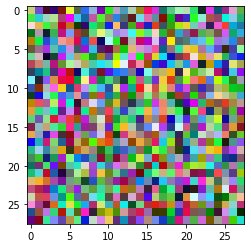

In [ ]:
import matplotlib.pyplot as plt
for data in dataset.take(1):
    plt.imshow(data[0])

## Serialización de imágenes ##

- **raw** encode `tf.io.serialize_tensor`, decode  `tf.io.parse_tensor`
- **jpeg** encode `tf.io.encode_jpeg`, decode`tf.io.decode_jpeg`, `tf.io.decode_and_crop_jpeg`
- **png** encode `tf.io.encode_png`, decode `tf.io.decode_png`


### Recomendaciones 

* Cuando tenga una base de datos demasiado grande opte por dividirlo en TFRecords(shards) de entre 100MB y 200MB
* Serialize sus array con `tf.io.serialize_tensor` y recuperelos con `tf.io.parse_tensor` (NO use `flatten`)

* Cuando serialize sus array con `tf.io.serialize_tensor` recuerde también guardar las dimensiones iniciales para recuperar su array 


### Referencias 

* [TFRecord and tf.train.Example(Tutorial Official Page)](https://www.tensorflow.org/tutorials/load_data/tfrecord)

* [Working with TFRecords and tf.train.Example](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d)

* [Carga y preprocesamiento de datos con TensorFlow](https://github.com/amalvarezme/AnaliticaDatos/blob/master/6_NN_DeepLearning/DataAPI_tf_carga_preproceso.ipynb)

* [tfrecord preprocesing keras tutorial](https://keras.io/examples/keras_recipes/creating_tfrecords/)

* [What does batch, repeat, and shuffle do with TensorFlow Dataset?](https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset)